In [14]:
import chemstation
import numpy as np
import matplotlib.pyplot as plt

In [57]:
o = chemstation.CHFile("C:\\Chem32\\1\\Data\\Van_Leusen_oxazole 2020-03-12 15-02-18\\005-0201.D\\DAD1B.ch")

Text(0.5, 1.0, 'Product')

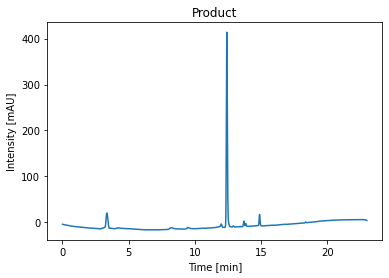

In [58]:
plt.plot(o.times, o.values)
plt.xlabel("Time [min]")
plt.ylabel("Intensity [mAU]")
plt.title("Product")

In [120]:
o = chemstation.CHFile("C:\\Chem32\\1\\Data\\Van_Leusen_oxazole 2020-03-12 15-02-18\\006-0301.D\\DAD1B.ch")

Text(0.5, 1.0, 'Product')

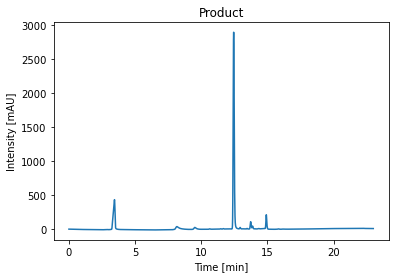

In [119]:
plt.plot(p2.times, p2.values)
plt.xlabel("Time [min]")
plt.ylabel("Intensity [mAU]")
plt.title("Product")

In [128]:
a = chemstation.CHFile("C:\Chem32\\1\Data\Van_Leusen_oxazole 2020-02-24 15-36-31\\002-0201.D\DAD1B.ch")

Text(0.5, 1.0, 'Aldehyde')

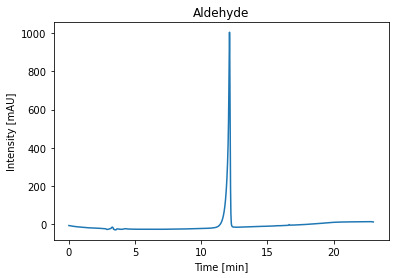

In [87]:
plt.plot(a.times, a.values)
plt.xlabel("Time [min]")
plt.ylabel("Intensity [mAU]")
plt.title("Aldehyde")


In [129]:
t = chemstation.CHFile("C:\Chem32\\1\Data\Van_Leusen_oxazole 2020-02-24 15-36-31\\003-0301.D\DAD1B.ch")

(-100.0, 2000.0)

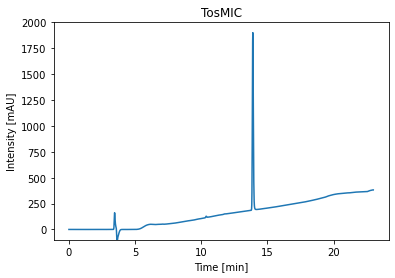

In [98]:
plt.plot(t.times, t.values)
plt.xlabel("Time [min]")
plt.ylabel("Intensity [mAU]")
plt.title("TosMIC")
plt.ylim(-100, 2000)

In [130]:
b = chemstation.CHFile("C:\Chem32\\1\Data\Van_Leusen_oxazole 2020-02-24 15-36-31\\001-0101.D\DAD1B.ch")

(-100.0, 1000.0)

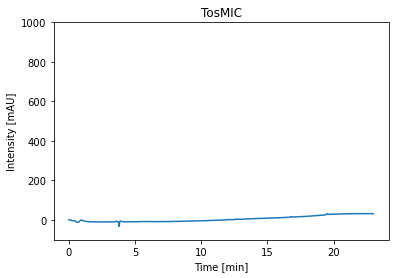

In [84]:
plt.plot(b.times, b.values)
plt.xlabel("Time [min]")
plt.ylabel("Intensity [mAU]")
plt.title("TosMIC")
plt.ylim(-100, 1000)

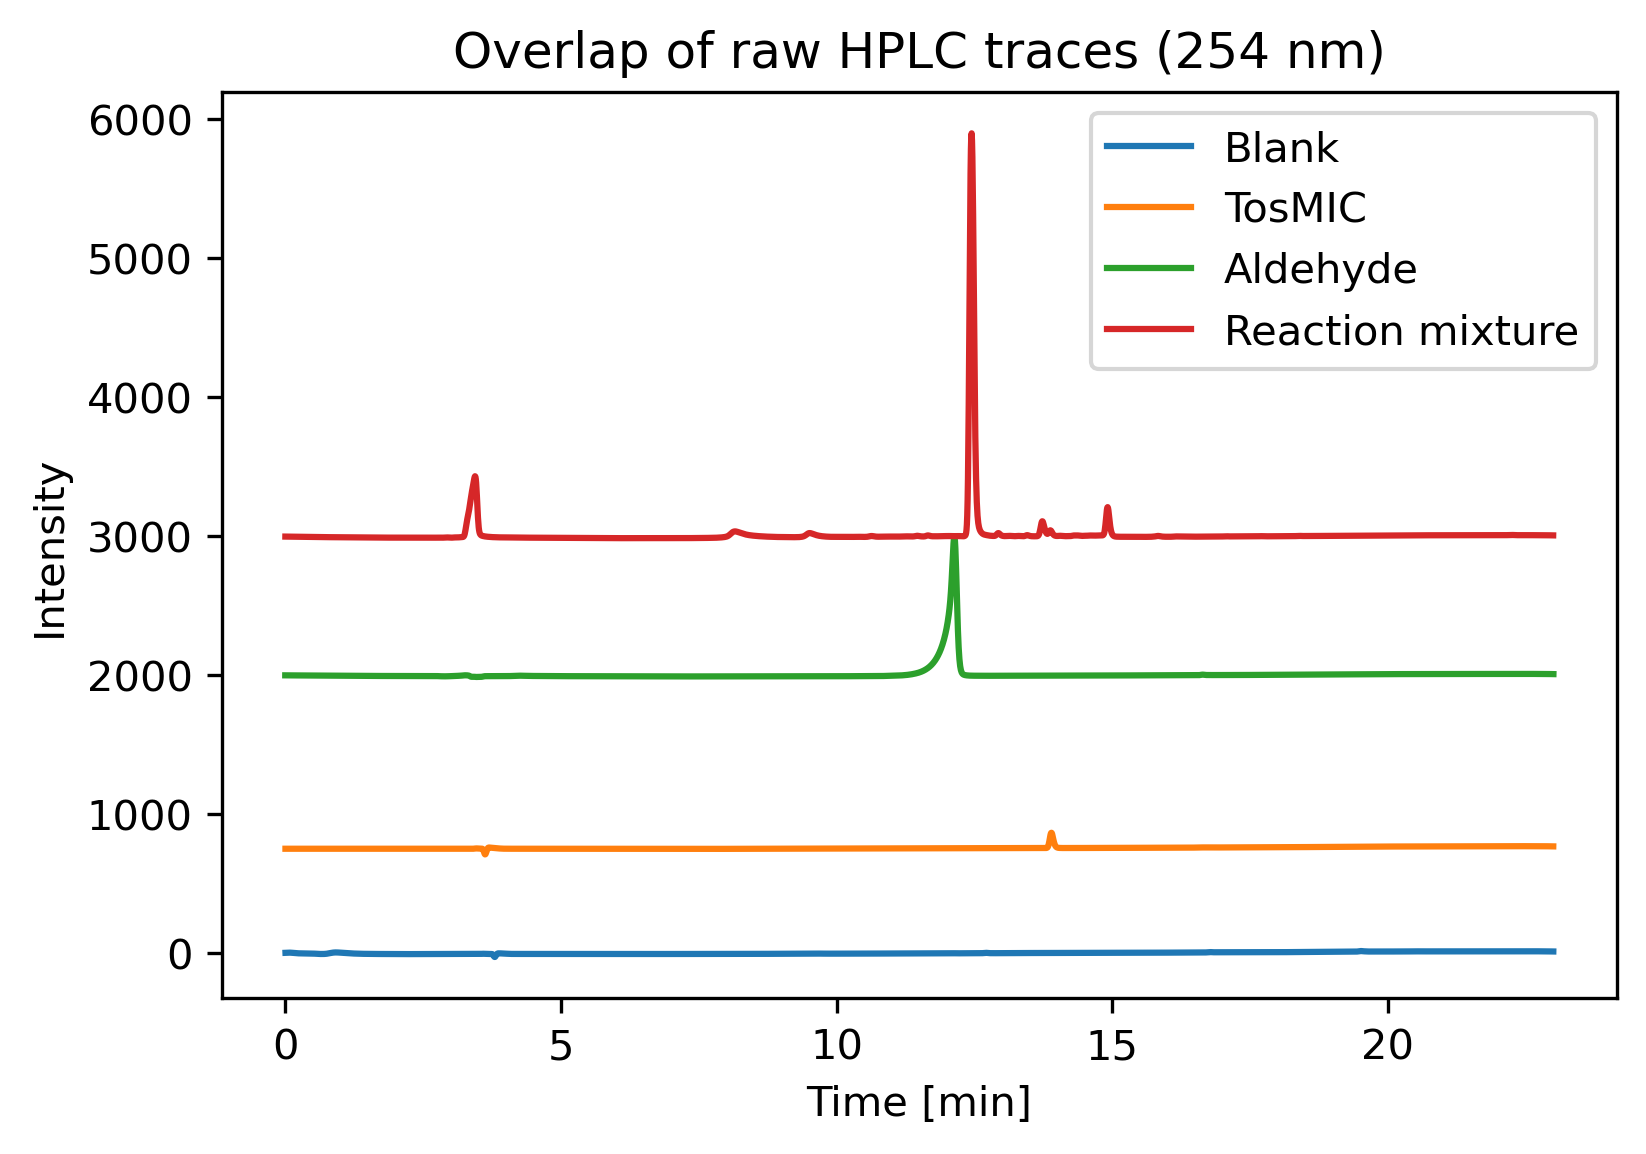

In [131]:
plt.figure(dpi=300)
plt.plot(b.times, b.values, label="Blank")

plt.plot(t.times, t.values+750, label="TosMIC")
plt.plot(a.times, a.values+2000, label="Aldehyde")
plt.plot(o.times, o.values+3000, label="Reaction mixture")
plt.xlabel("Time [min]")
plt.ylabel("Intensity")
plt.title("Overlap of raw HPLC traces (254 nm)")
#plt.ylim(-100, 5000)
plt.legend()
plt.savefig("hplc_stacked")

In [99]:


import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import PolyCollection
from matplotlib.colors import colorConverter
from mpl_toolkits.mplot3d import Axes3D



In [104]:
np.array((t.values, a.values, o.values))

<ipython-input-104-65e9ff421ebe>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  np.array((t.values, a.values, o.values))


array([array([0.00000000e+00, 4.29153442e-03, 1.09672546e-02, ...,
       3.81962299e+02, 3.81864548e+02, 3.81730556e+02]),
       array([-5.72013855, -5.81645966, -5.90991974, ..., 13.38291168,
       13.29421997, 13.20266724]),
       array([-4.03594971, -4.0845871 , -4.1308403 , ...,  4.48703766,
        4.41789627,  4.34732437])], dtype=object)

TypeError: object of type 'numpy.float64' has no len()

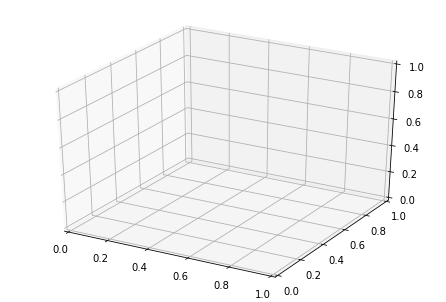

In [102]:
fig=plt.figure()
ax = Axes3D(fig)
 
poly = PolyCollection(t.times)
ax.add_collection3d(poly, zs=t.values, zdir='y')
#ax.set_xlim(xmin,xmax)
#ax.set_ylim(ymin,ymax)
#ax.set_zlim(zmin,zmax)
plt.show()

In [ ]:
T = 60.
n = 512
t = np.linspace(-T/2., T/2., n+1)
t = t[0:n]
# There's a function to set up the frequencies, but doing it by hand seems to help me think 
# things through.
k = np.array([(2. * np.pi)*i if i < n/2 else (2. * np.pi) * (i - n) 
  for i in range(n)])

ks = np.fft.fftshift(k)
slc = np.arange(0, 10, 0.5)
# I haven't quite figured out how to use the meshgrid function in numpy
T, S = np.meshgrid(t, slc)
K, S = np.meshgrid(k, slc)

# Now, we have a plane flying back and forth in a sine wave and getting painted by a radar pulse
# which is a hyperbolic secant (1/cosh)
U = 1./np.cosh(T - 10. * np.sin(S)) * np.exp(1j * 0. * T)

def waterfall(X, Y, Z, nslices):

  # Function to generate formats for facecolors
  cc = lambda arg: colorConverter.to_rgba(arg, alpha=0.3)
  # This is just wrong. There must be some way to use the meshgrid or why bother.
  verts = []
  for i in range(nslices):
    verts.append(list(zip(X[i], Z[i])))

  xmin = np.floor(np.min(X))
  xmax = np.ceil(np.max(X))
  ymin = np.floor(np.min(Y))
  ymax = np.ceil(np.max(Y))
  zmin = np.floor(np.min(Z.real))
  zmax = np.ceil(np.max(np.abs(Z)))

  fig=plt.figure()
  ax = Axes3D(fig)
 
  poly = PolyCollection(verts, facecolors=[cc('g')])
  ax.add_collection3d(poly, zs=slc, zdir='y')
  ax.set_xlim(xmin,xmax)
  ax.set_ylim(ymin,ymax)
  ax.set_zlim(zmin,zmax)
  plt.show()

waterfall(T, S, U.real, len(slc))